<!-- WARNING: THIS FILE WAS AUTOGENERATED! DO NOT EDIT! -->

## Initial Checks

In [ ]:
#|eval: false
!conda list | grep "pytorch"

ffmpeg                    4.3                  hf484d3e_0    pytorch
libjpeg-turbo             2.0.0                h9bf148f_0    pytorch
pytorch                   2.0.1           py3.11_cuda11.8_cudnn8.7.0_0    pytorch
pytorch-cuda              11.8                 h7e8668a_5    pytorch
pytorch-ignite            0.4.12                   pypi_0    pypi
pytorch-lightning         2.0.7                    pypi_0    pypi
pytorch-mutex             1.0                        cuda    pytorch
torchaudio                2.0.2               py311_cu118    pytorch
torchtriton               2.0.0                     py311    pytorch
torchvision               0.15.2              py311_cu118    pytorch


In [ ]:
#|eval: false
!pip list | grep "fastai" 
!pip list | grep "fastbook"
!pip list | grep "ipywidgets"
!pip list | grep "fastAIcourse"

fastai                        2.7.12
fastbook                      0.0.28
ipywidgets                    8.1.0


In [ ]:
#|eval: false
import torch

In [ ]:
#|eval: false
torch.cuda.is_available()

True

## Gather Data

In [ ]:
#|eval: false
from fastbook import search_images_ddg
from fastdownload import download_url
from fastai.vision.all import *
import os

In [ ]:
#|eval: false
from nbdevAuto.functions import *

Image file exists.


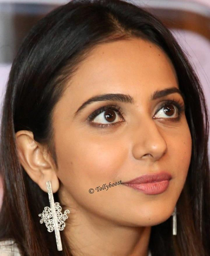

In [ ]:
#|eval: false
download_pic('indian actor close up',
             name = 'indian', 
             folder = './Data/actors_test', 
             n_images = 10)

In [ ]:
#|eval: false
file_path = "./Data/countries.txt"
searches = read_from_file(file_path)
print(searches)

('Chinese', 'Indian', 'American', 'Indonesian', 'Pakistani', 'Brazilian', 'Nigerian', 'Bangladeshi', 'Russian', 'Mexican')


In [ ]:
#|code-fold: true
#|eval: false
path = Path('Data/actors')

create_data_folder(folder_path = path,
                   searches = searches,
                   before = 'Famous ',
                   after = ' actor close up',
                   amount = 400,
                   recreate = False
                  )

created Chinese folder
created Indian folder
created American folder
created Indonesian folder
created Pakistani folder
created Brazilian folder
created Nigerian folder
created Bangladeshi folder
created Russian folder
created Mexican folder
Error with 400 images of Famous Chinese actor close up: 'next'
downloading 380 images for:Famous Chinese actor close up
downloading 400 images for:Famous Indian actor close up
Error with 400 images of Famous American actor close up: 'next'
Error with 380 images of Famous American actor close up: 'next'
Error with 360 images of Famous American actor close up: 'next'
Error with 340 images of Famous American actor close up: 'next'
downloading 320 images for:Famous American actor close up
Error with 400 images of Famous Indonesian actor close up: 'next'
Error with 380 images of Famous Indonesian actor close up: 'next'
downloading 360 images for:Famous Indonesian actor close up
Error with 400 images of Famous Pakistani actor close up: 'next'
Error with 

## Design Model

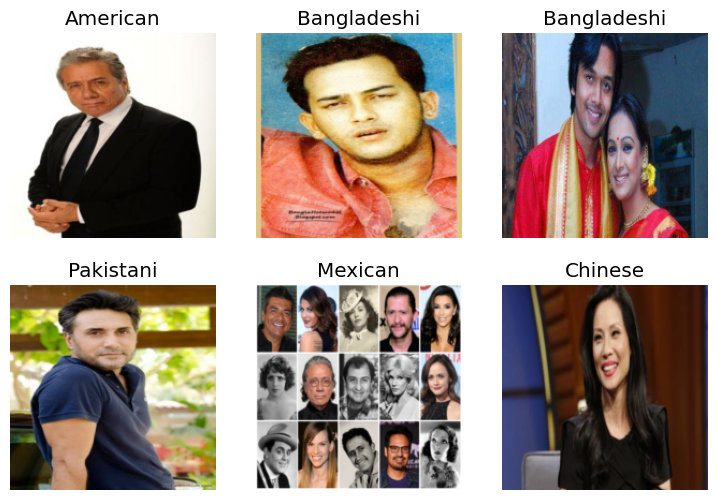

In [ ]:
#|eval: false
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.3, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

dls.show_batch(max_n=6)

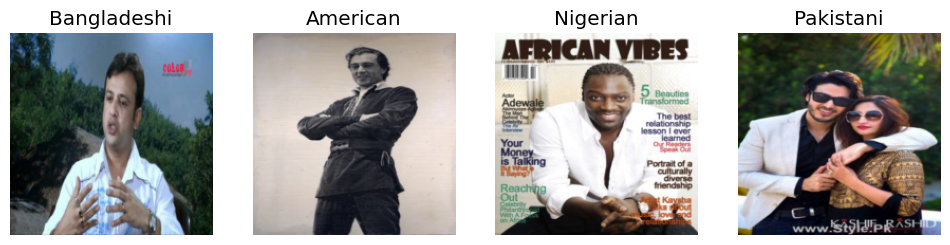

In [ ]:
#|eval: false
dls.valid.show_batch(max_n=4, nrows=1)

In [ ]:
#|eval: false
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(5)

/home/thekkel/mambaforge/envs/cfast/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/thekkel/mambaforge/envs/cfast/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,3.237104,2.157221,0.648262,00:12


/home/thekkel/mambaforge/envs/cfast/lib/python3.11/site-packages/torch/nn/modules/conv.py:459: UserWarning: Applied workaround for CuDNN issue, install nvrtc.so (Triggered internally at /opt/conda/conda-bld/pytorch_1682343995622/work/aten/src/ATen/native/cudnn/Conv_v8.cpp:80.)
  return F.conv2d(input, weight, bias, self.stride,


epoch,train_loss,valid_loss,error_rate,time
0,2.234727,2.012611,0.616564,00:12
1,1.768451,1.982863,0.580777,00:12
2,1.236404,2.019062,0.570552,00:12
3,0.818626,2.025416,0.564417,00:12
4,0.563943,2.035059,0.563395,00:12


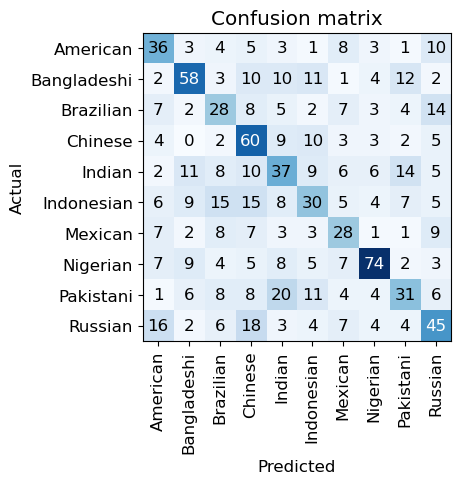

In [ ]:
#|eval: false
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

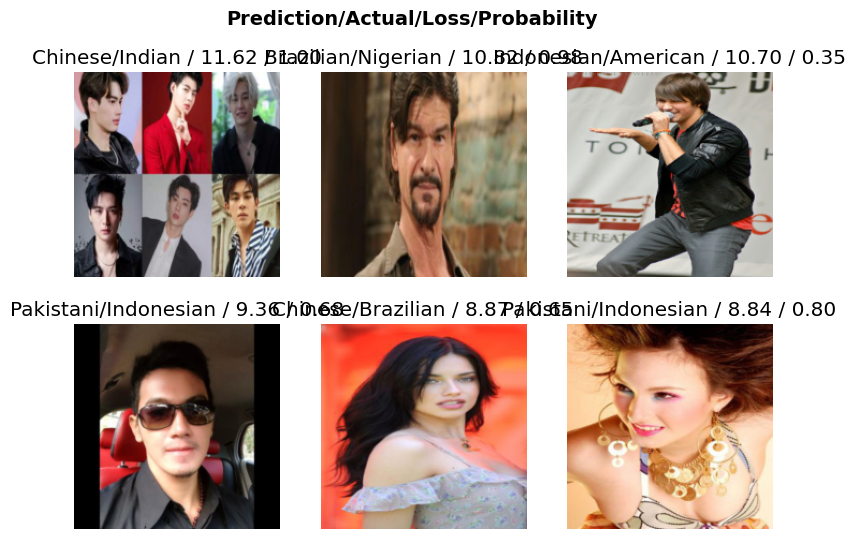

In [ ]:
#|eval: false
interp.plot_top_losses(6, nrows=2)

## Testing

{'American': 0.1894, 'Bangladeshi': 0.01233, 'Brazilian': 1.23315, 'Chinese': 0.10789, 'Indian': 96.95181, 'Indonesian': 0.01872, 'Mexican': 1.12045, 'Nigerian': 0.06014, 'Pakistani': 0.22589, 'Russian': 0.08024}


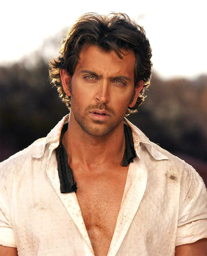

In [ ]:
#|eval: false
image= f'./Data/actors_test/indian{8}.jpg'

print(classify_images(learn, image))
Image.open(image).to_thumb(256,256)

## New models

In [ ]:
#|eval: false
!pip list | grep 'timm'

timm                          0.9.5


In [ ]:
#|eval: false
import timm

In [ ]:
#|eval: false
timm.list_models('convnext*')[0:5]

['convnext_atto',
 'convnext_atto_ols',
 'convnext_base',
 'convnext_femto',
 'convnext_femto_ols']

In [ ]:
#|eval: false
timm.list_models('resnet1*')[0:5]

['resnet10t', 'resnet14t', 'resnet18', 'resnet18d', 'resnet101']

In [ ]:
#|eval: false
learn1 = vision_learner(dls, 'resnet26', metrics=error_rate).to_fp16()
learn1.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,3.092124,2.349505,0.621677,00:12


epoch,train_loss,valid_loss,error_rate,time
0,1.567738,1.892811,0.582822,00:12
1,1.350685,1.997062,0.583845,00:12
2,0.999878,1.917904,0.557260,00:12
3,0.722230,1.904662,0.559305,00:12
4,0.546816,1.917267,0.559305,00:12


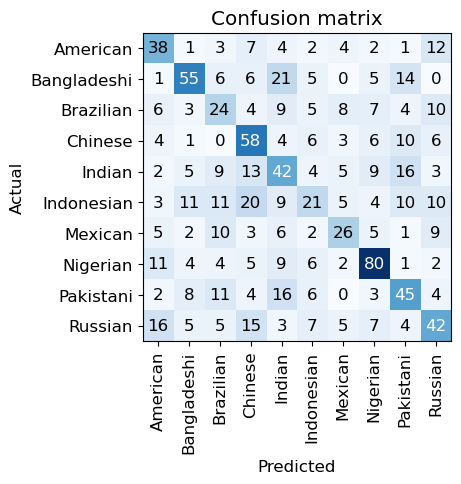

In [ ]:
#|eval: false
interp = ClassificationInterpretation.from_learner(learn1)
interp.plot_confusion_matrix()

{'American': 0.0396, 'Bangladeshi': 0.04292, 'Brazilian': 0.76923, 'Chinese': 0.01913, 'Indian': 98.80077, 'Indonesian': 0.02541, 'Mexican': 0.07943, 'Nigerian': 0.00226, 'Pakistani': 0.22104, 'Russian': 0.00023}


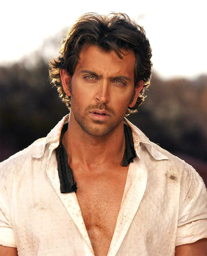

In [ ]:
#|eval: false
print(classify_images(learn1, image))
Image.open(image).to_thumb(256,256)

In [ ]:
#|eval: false
learn2 = vision_learner(dls, 'resnetv2_50', metrics=error_rate).to_fp16()
learn2.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,3.178196,2.198623,0.689162,00:12


epoch,train_loss,valid_loss,error_rate,time
0,1.799243,2.126705,0.610429,00:12
1,1.612651,2.156930,0.625767,00:13
2,1.321369,2.140200,0.617587,00:12
3,1.025269,2.146328,0.619632,00:13
4,0.833195,2.127964,0.605317,00:13


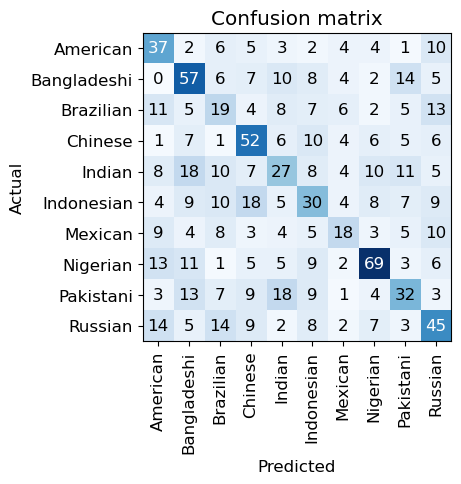

In [ ]:
#|eval: false
interp = ClassificationInterpretation.from_learner(learn2)
interp.plot_confusion_matrix()

{'American': 0.61548, 'Bangladeshi': 8.0403, 'Brazilian': 3.33211, 'Chinese': 0.35223, 'Indian': 86.44138, 'Indonesian': 0.27526, 'Mexican': 0.11661, 'Nigerian': 0.1272, 'Pakistani': 0.51125, 'Russian': 0.18817}


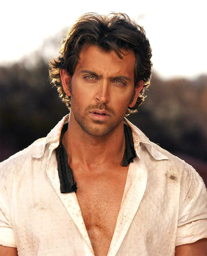

In [ ]:
#|eval: false
print(classify_images(learn2, image))
Image.open(image).to_thumb(256,256)

In [ ]:
#|eval: false
learn3 = vision_learner(dls, 'convnextv2_tiny', metrics=error_rate).to_fp16()
learn3.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,3.107669,1.806186,0.576687,00:15
1,2.231998,1.537701,0.505112,00:15
2,1.638607,1.458500,0.475460,00:15
3,1.290669,1.433112,0.460123,00:15
4,1.054466,1.427431,0.462168,00:15


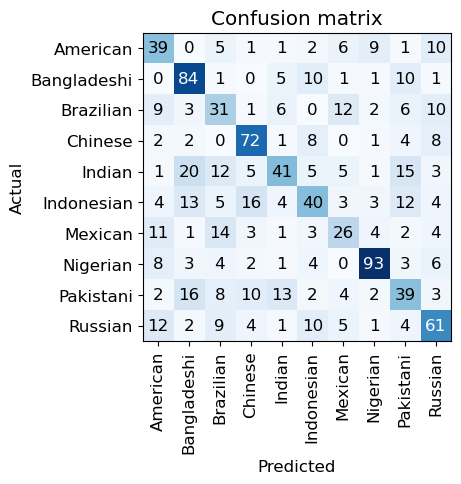

In [ ]:
#|eval: false
interp = ClassificationInterpretation.from_learner(learn3)
interp.plot_confusion_matrix()

{'American': 0.13512, 'Bangladeshi': 1.25854, 'Brazilian': 14.96051, 'Chinese': 0.03759, 'Indian': 55.2603, 'Indonesian': 0.08406, 'Mexican': 26.56602, 'Nigerian': 0.2674, 'Pakistani': 1.39631, 'Russian': 0.03416}


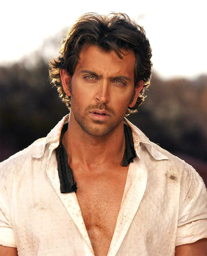

In [ ]:
#|eval: false
print(classify_images(learn3, image))
Image.open(image).to_thumb(256,256)

In [ ]:
#|eval: false
m = learn3.model
m

Sequential(
  (0): TimmBody(
    (model): ConvNeXt(
      (stem): Sequential(
        (0): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
        (1): LayerNorm2d((96,), eps=1e-06, elementwise_affine=True)
      )
      (stages): Sequential(
        (0): ConvNeXtStage(
          (downsample): Identity()
          (blocks): Sequential(
            (0): ConvNeXtBlock(
              (conv_dw): Conv2d(96, 96, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=96)
              (norm): LayerNorm((96,), eps=1e-06, elementwise_affine=True)
              (mlp): GlobalResponseNormMlp(
                (fc1): Linear(in_features=96, out_features=384, bias=True)
                (act): GELU()
                (drop1): Dropout(p=0.0, inplace=False)
                (grn): GlobalResponseNorm()
                (fc2): Linear(in_features=384, out_features=96, bias=True)
                (drop2): Dropout(p=0.0, inplace=False)
              )
              (shortcut): Identity()
              (drop_p

In [ ]:
#|eval: false
l = m.get_submodule('0.model.stem.1')
list(l.parameters())

[Parameter containing:
 tensor([ 4.9251e+00, -1.4288e-02,  1.1278e+00,  3.5363e-01,  2.0704e-01,  4.6967e-01, -9.6580e-03,  1.9097e+00,  3.0272e+00,  1.5601e+00,  5.8281e-01, -1.7258e-02,  3.3910e+00,  1.2354e+00,
         -2.2328e-02,  2.1194e+00,  1.7306e+00,  7.7316e-01,  2.3331e+00,  3.1620e+00,  1.6824e+00,  1.3200e+00,  3.7273e-01,  2.2075e+00,  1.7813e-01,  1.5075e-01,  1.8244e+00,  4.2152e-04,
          2.3992e+00,  3.6781e+00,  4.0683e-01,  2.0817e-02,  3.6065e-01,  1.2063e+00,  7.2426e-01,  2.8595e-01,  2.4100e+00,  3.1176e-01,  6.9409e-01,  6.4475e-01,  7.6915e-01,  1.9693e-03,
          2.7283e-01,  5.3483e-01,  8.1155e-01,  3.2665e-01,  8.0660e-01,  5.9821e-01,  2.1247e-01,  3.4257e-01,  2.2293e+00,  1.9164e-02,  1.1592e+00,  1.1037e-02,  3.2539e+00,  5.8598e-01,
          2.2025e-01,  4.1884e+00,  2.8832e-01,  8.3824e-01,  4.9160e-03,  2.5150e-03,  6.7102e-01,  2.4287e-01,  1.2616e+00,  2.7972e-01,  6.4407e-01,  2.6034e-01,  4.6911e+00,  6.5770e-01,
         -1.1079e-02, 